# Tidy data

- Weblink
    - http://r4ds.had.co.nz/tidy-data.html
- Main Content
    - mutate
    - Spreading and gathering
    - Separating and uniting
    - Missing values
    - Case Study

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [37]:
# after running examples, I found that the example can be extract as follow
print("table1")
tidyr::table1
print("table2")
tidyr::table2
print("table3")
tidyr::table3
print("table4a")
tidyr::table4a
print("table4b")
tidyr::table4b
print("table5")
tidyr::table5

[1] "table1"


country,year,cases,population
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


[1] "table2"


country,year,type,count
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258
China,1999,population,1272915272


[1] "table3"


country,year,rate
Afghanistan,1999,745/19987071
Afghanistan,2000,2666/20595360
Brazil,1999,37737/172006362
Brazil,2000,80488/174504898
China,1999,212258/1272915272
China,2000,213766/1280428583


[1] "table4a"


country,1999,2000
Afghanistan,745,2666
Brazil,37737,80488
China,212258,213766


[1] "table4b"


country,1999,2000
Afghanistan,19987071,20595360
Brazil,172006362,174504898
China,1272915272,1280428583


[1] "table5"


country,century,year,rate
Afghanistan,19,99,745/19987071
Afghanistan,20,00,2666/20595360
Brazil,19,99,37737/172006362
Brazil,20,00,80488/174504898
China,19,99,212258/1272915272
China,20,00,213766/1280428583


# 12.1 Introduction

In [8]:
table1 <- read_csv(
"country,year,cases,population
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583")
table1

country,year,cases,population
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


# 12.2 Tidy data

In [9]:
# Compute rate per 10,000
table1 %>% mutate(rate = cases / population * 10000)

country,year,cases,population,rate
Afghanistan,1999,745,19987071,0.372741
Afghanistan,2000,2666,20595360,1.294466
Brazil,1999,37737,172006362,2.193930
Brazil,2000,80488,174504898,4.612363
China,1999,212258,1272915272,1.667495
China,2000,213766,1280428583,1.669488


In [10]:
# Compute cases per year
table1 %>% count(year, wt = cases)
# Note: https://github.com/tidyverse/dplyr/issues/2043

year,n
1999,250740
2000,296920


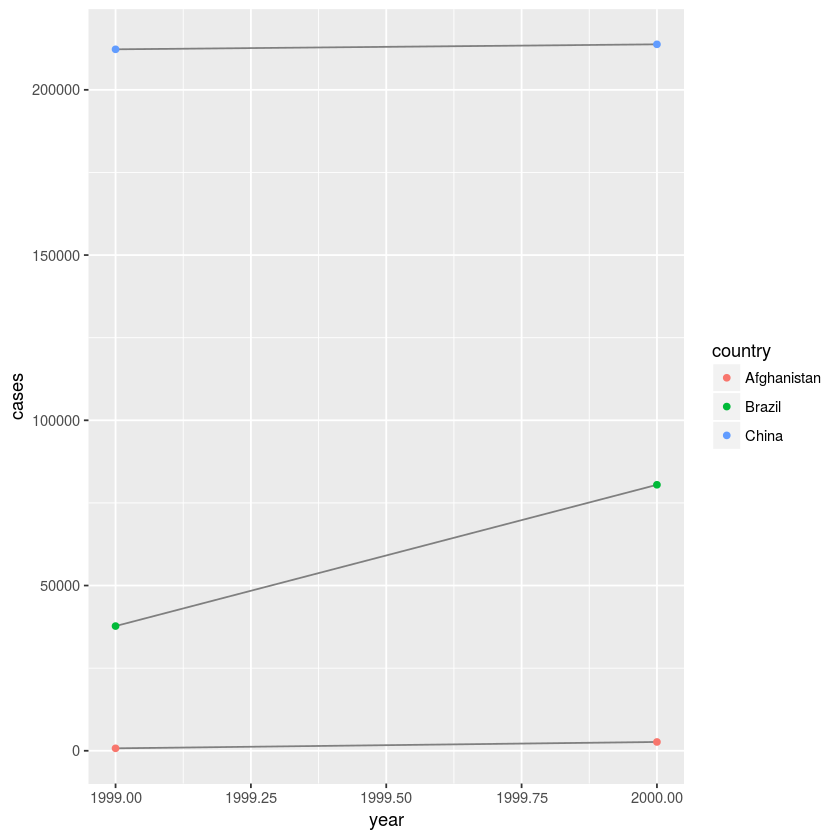

In [13]:
# Visualise changes over time
ggplot(table1, aes(year, cases)) +
    geom_line(aes(group = country), color = "grey50") + 
    geom_point(aes(color = country))

# 12.3 Spreading and gathering

## Gathering

In [14]:
table4a <- read_csv(
   "country, `1999`, `2000`
Afghanistan,    745,   2666
     Brazil,  37737,  80488
      China, 212258, 213766")
table4a

country,`1999`,`2000`
Afghanistan,745,2666
Brazil,37737,80488
China,212258,213766


In [16]:
#table4a %>% gather(`1999`, `2000`, key = "year", value = "cases")
table4a %>% gather(year, cases, -country)

country,year,cases
Afghanistan,`1999`,745
Brazil,`1999`,37737
China,`1999`,212258
Afghanistan,`2000`,2666
Brazil,`2000`,80488
China,`2000`,213766


In [17]:
table4b  <- read_csv("
    country,     `1999`,     `2000`
Afghanistan,   19987071,   20595360
     Brazil,  172006362,  174504898
      China, 1272915272, 1280428583")
table4b

country,`1999`,`2000`
country,`1999`,`2000`
Afghanistan,19987071,20595360
Brazil,172006362,174504898
China,1272915272,1280428583


In [19]:
#table4b %>% gather(`1999`, `2000`, key = "year", value = "population")
table4b %>% gather(year, population, -country)

country,year,population
country,`1999`,`1999`
Afghanistan,`1999`,19987071
Brazil,`1999`,172006362
China,`1999`,1272915272
country,`2000`,`2000`
Afghanistan,`2000`,20595360
Brazil,`2000`,174504898
China,`2000`,1280428583


In [20]:
#tidy4a <- table4a %>% 
#  gather(`1999`, `2000`, key = "year", value = "cases")
#tidy4b <- table4b %>% 
#  gather(`1999`, `2000`, key = "year", value = "population")
tidy4a <- table4a %>% gather(year, cases, -country)
tidy4b <- table4b %>% gather(year, population, -country)
left_join(tidy4a, tidy4b)

Joining, by = c("country", "year")


country,year,cases,population
Afghanistan,`1999`,745,19987071
Brazil,`1999`,37737,172006362
China,`1999`,212258,1272915272
Afghanistan,`2000`,2666,20595360
Brazil,`2000`,80488,174504898
China,`2000`,213766,1280428583


## Spreading

In [23]:
table2 <- table1 %>% gather(type, count, -country, -year)
table2

country,year,type,count
Afghanistan,1999,cases,745
Afghanistan,2000,cases,2666
Brazil,1999,cases,37737
Brazil,2000,cases,80488
China,1999,cases,212258
China,2000,cases,213766
Afghanistan,1999,population,19987071
Afghanistan,2000,population,20595360
Brazil,1999,population,172006362
Brazil,2000,population,174504898


In [24]:
spread(table2, key = type, value = count)

country,year,cases,population
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


## Exercise

Q3

In [26]:
people <- tribble(
  ~name,             ~key,    ~value,
  #-----------------|--------|------
  "Phillip Woods",   "age",       45,
  "Phillip Woods",   "height",   186,
  "Phillip Woods",   "age",       50,
  "Jessica Cordero", "age",       37,
  "Jessica Cordero", "height",   156
)
people

name,key,value
Phillip Woods,age,45
Phillip Woods,height,186
Phillip Woods,age,50
Jessica Cordero,age,37
Jessica Cordero,height,156


Q4

In [27]:
preg <- tribble(
  ~pregnant, ~male, ~female,
  "yes",     NA,    10,
  "no",      20,    12
)
preg

pregnant,male,female
yes,NA,10
no,20,12


# 12.4 Separating and uniting

## Separate

In [31]:
table3 <- tribble(
     ~country, ~year,             ~rate,
#>      <chr>  <int>              <chr>
"Afghanistan",  1999,      "745/19987071",
"Afghanistan",  2000,     "2666/20595360",
     "Brazil",  1999,   "37737/172006362",
     "Brazil",  2000,   "80488/174504898",
      "China",  1999, "212258/1272915272",
      "China",  2000, "213766/1280428583")
table3

country,year,rate
Afghanistan,1999,745/19987071
Afghanistan,2000,2666/20595360
Brazil,1999,37737/172006362
Brazil,2000,80488/174504898
China,1999,212258/1272915272
China,2000,213766/1280428583


In [32]:
# By default, separate() will split values wherever it sees a non-alphanumeric character
table3 %>% separate(rate, into = c("cases", "population"))

country,year,cases,population
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [33]:
table3 %>% separate(rate, into = c("cases", "population"), sep = "/")

country,year,cases,population
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [34]:
# the default behaviour in separate(): it leaves the type of the column as is
# We can ask separate() to try and convert to better types using convert = TRUE
table3 %>% separate(rate, into = c("cases", "population"), convert = TRUE)

country,year,cases,population
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


## Unite

In [39]:
table5 <- tidyr::table5
table5

country,century,year,rate
Afghanistan,19,99,745/19987071
Afghanistan,20,00,2666/20595360
Brazil,19,99,37737/172006362
Brazil,20,00,80488/174504898
China,19,99,212258/1272915272
China,20,00,213766/1280428583


In [40]:
table5 %>% unite(new, century, year) # unite new by centry and year

country,new,rate
Afghanistan,19_99,745/19987071
Afghanistan,20_00,2666/20595360
Brazil,19_99,37737/172006362
Brazil,20_00,80488/174504898
China,19_99,212258/1272915272
China,20_00,213766/1280428583


In [41]:
table5 %>% unite(new, century, year, sep = "")

country,new,rate
Afghanistan,1999,745/19987071
Afghanistan,2000,2666/20595360
Brazil,1999,37737/172006362
Brazil,2000,80488/174504898
China,1999,212258/1272915272
China,2000,213766/1280428583


# 12.5 Missing Values

# 12.6 Case Study

# 12.7 Non-tidy data